# Slack Analytics
### Joshua Cooper, Maximilian Bartolo and Simon Stiebellehner

#### This is a Satalia project showing Satalia's (anonymised) data. Satalia are happy to receive feedback at <roberto@satalia.com>.

We produce novel analytics tools that generate reproducible and meaningful visualisations. Tools built include:
* Mutual connectedness for two users
 * Matrix
 * Graph
* Message density both by time of day and day of year
* Individual time distribution
* Comparing users over time
* Comparing channels over time

We use two data sources:
* Data from channels (_public_ data)
* Data from private messages (_private_ data)

First, we import all the functionality we have built in the `util.py` file.

In [1]:
from util import *
%matplotlib inline

# Data Wrangling - Private data

In [2]:
df_private = pd.read_csv("data/Slack-Private.csv", low_memory=False) # load private dataframe
df_private = preprocess_time(df_private)                             # preprocess time
df_private = df_private.drop('Unnamed: 0', 1)                        # drop the "Unnamed: 0" column
df_public = pd.read_csv("data/Slack-New.csv", low_memory=False)      # load public dataframe
df_private = replace_userid(df_private, df_ref=df_public)            # replace userid with username
preprocess_chat_members(df_private)                                  # preprocess chat members
df_private = remove_infrequent(df_private, 10)                       # remove infrequent users
df_private = df_private.drop('index', 1)                             # drop 'index' column
create_emojis(df_private)                                            # create emojis
sent_analysis(df_private)                                            # sentiment analysis
df_private_exploded = pd.concat([df_private, df_private.chat_members.apply(pd.Series)], axis=1) # expand chat members
df_private_exploded.columns.values[-7:] = ['member_'+str(n) for n in range(7)] # change new column names

Losing 0.24% of data and 13.33% of users by removing infrequent users. Proceed? ('y' or 'n')


# Connectedness

If $x$ and $y$ are individual users (among $N$ total users), we define mutual connectedness as:

$$
\begin{aligned}
\text{Mutual connectedness}(x,y) &= \frac{\mid\text{messages}_{x\rightarrow y}\mid + \mid\text{messages}_{y\rightarrow x}\mid}{\mid\sum_{n\in N}\text{messages}_{x\rightarrow n}\mid + \mid\sum_{n\in N}\text{messages}_{y\rightarrow n}\mid}\\[1em]
&= \frac{\text{# messages from x to y + # messages from y to x}}{\text{# messages sent by x + # messages sent by y }}
\end{aligned}$$

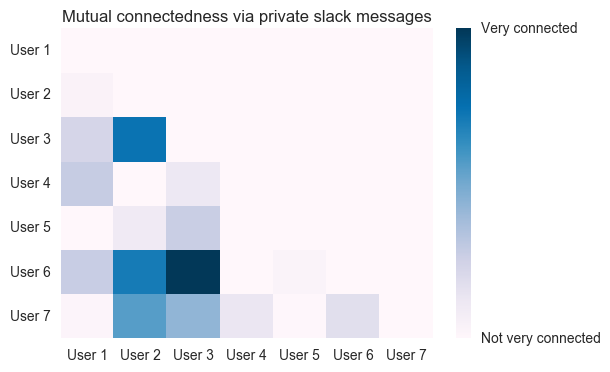

In [4]:
user_list = ['User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 6', 'User 7']

user_matrix = plot_user_matrix(user_list , df_private_exploded)

The above shows us that users 3 and 6 are strongly mutually connected. Below, we plot the same data in graph form.

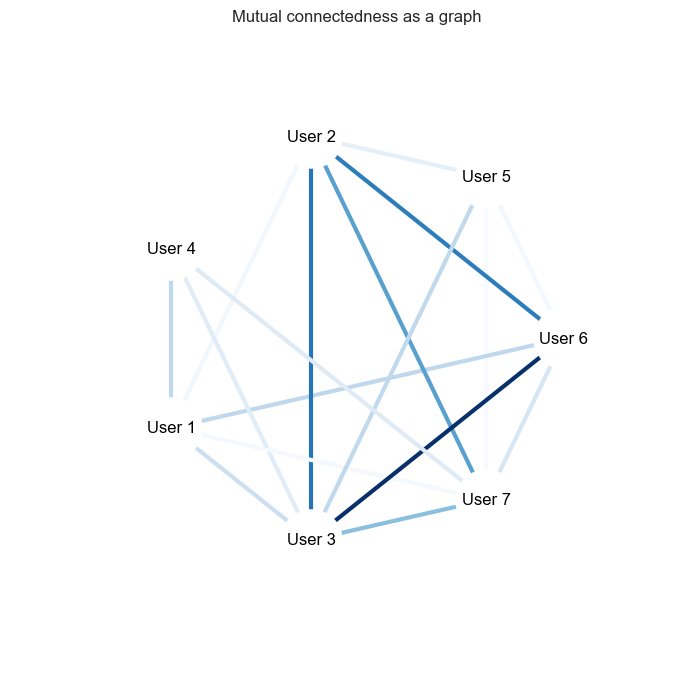

In [5]:
#Plot user connectedness graph
plot_user_connectedness_graph(user_matrix, user_list)

This visualisation approach is useful as it allows us to see larger connectedness structures emerging. For example, users 3, 6 and 2 arguably form a clique.

# Sentiment

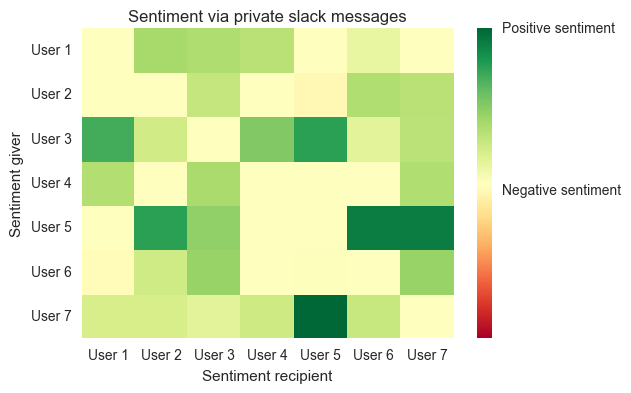

In [6]:
_ = plot_sentiment_matrix(user_list , df_private_exploded)

The above visualisation shows us that User 3 is generally positive to others, and tends to receive positive sentiment in return.

# Data Wrangling - Public data

In [7]:
df_public = df_public[df_public.userid != "USLACKBOT"]                              # remove slackbot
df_public = preprocess_time(df_public)                                              # preprocess time
df_public.loc[df_public.fullname.isnull() == True,'fullname'] = \                   # get rid of null entries
df_public.loc[df_public.fullname.isnull() == True,'username'].apply(null_conversion)
fullname_username_map, private_name_map = create_fullname_username_map(df_public)   # create fullnames
df_public.username = df_public.fullname.apply(merge_usernames, args=[fullname_username_map])# merge usernames
df_public = remove_infrequent(df_public, 50)                                        # remove infrequent
remove_msg(df_public)                                                               # remove unhelpful messages
create_num_mentions(df_public)                                                      # create mentions
create_emojis(df_public)                                                            # create emojis
sent_analysis(df_public)                                                            # sentiment analysis

Losing 1.07% of data and 54.27% of users by removing infrequent users. Proceed? ('y' or 'n')


# User activity over the day and year

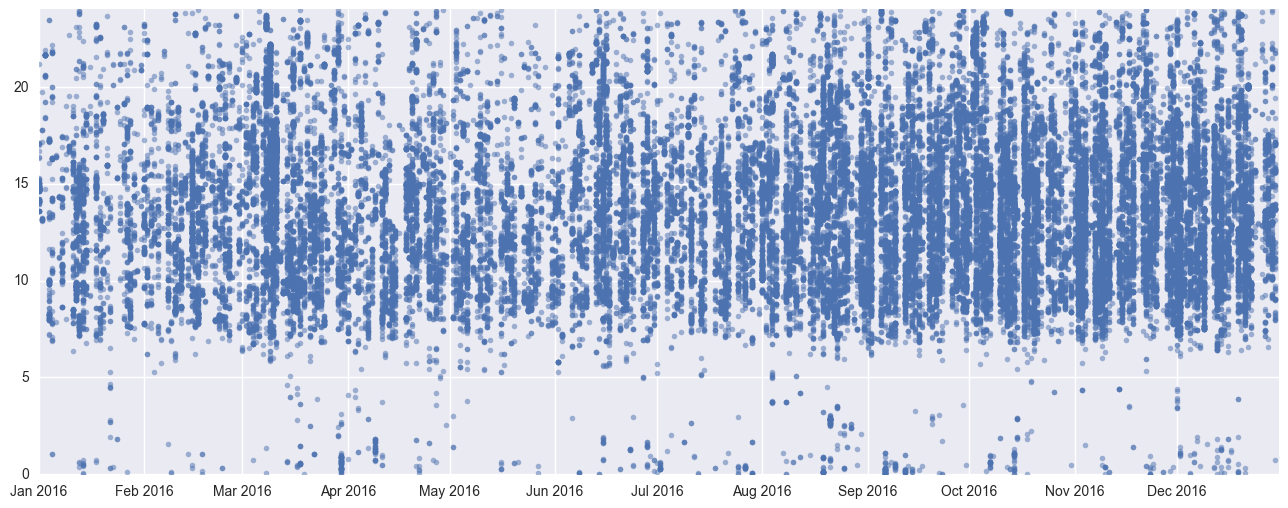

In [8]:
plot_time(df_public, '2016-01-01', '2016-12-31')

# Individual User: Time Distribution

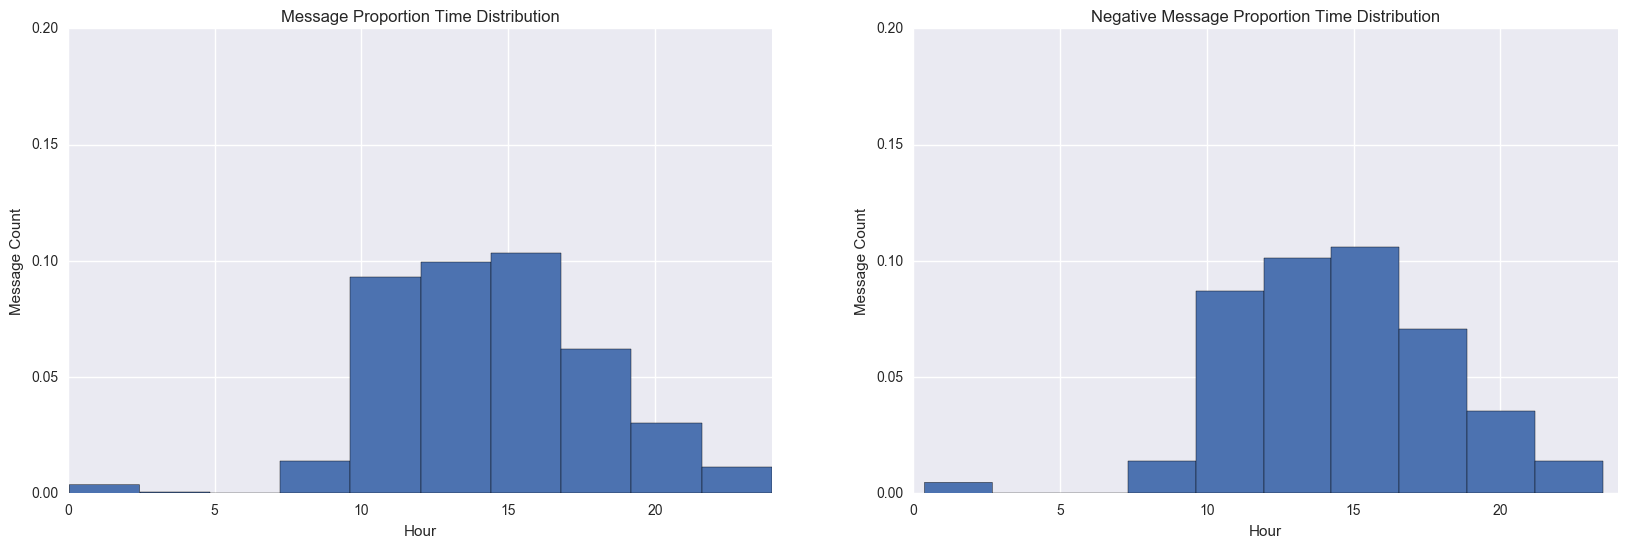

In [10]:
plot_individual_user_time(df_public, 'User 1', 0.2)

# Dashboard: Comparing users over time

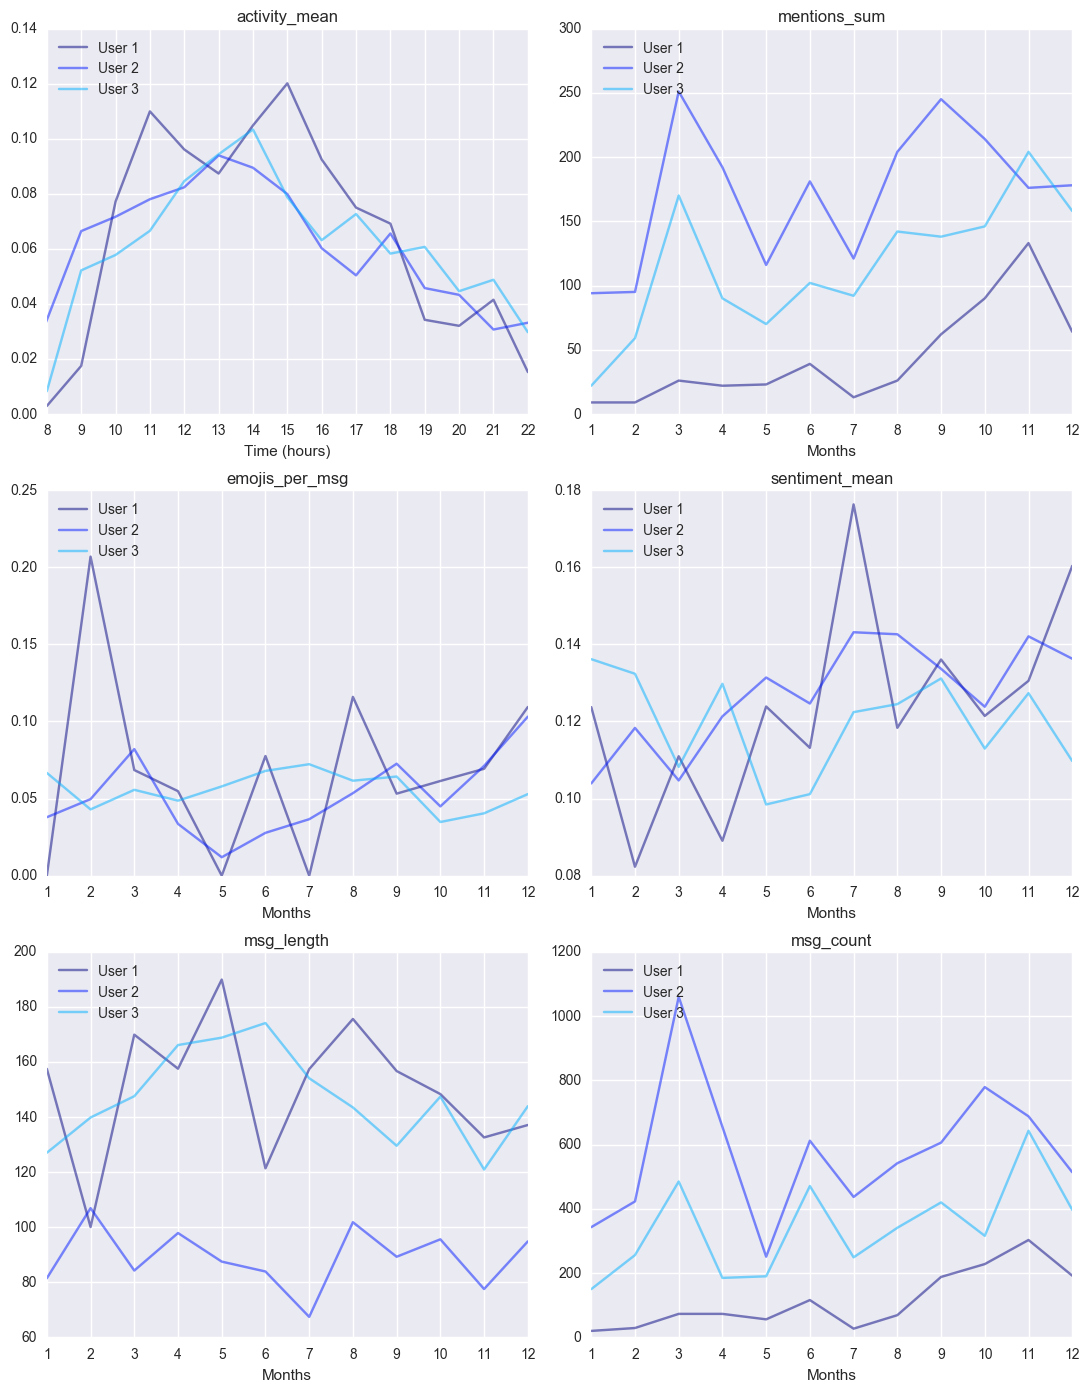

In [11]:
objs = [['User 1', 'user'],
        ['User 2', 'user'],
        ['User 3', 'user']]

plot_compare_objs(df_public, objs=objs, start_month=1, end_month=12)

# Dashboard: Comparing channels over time

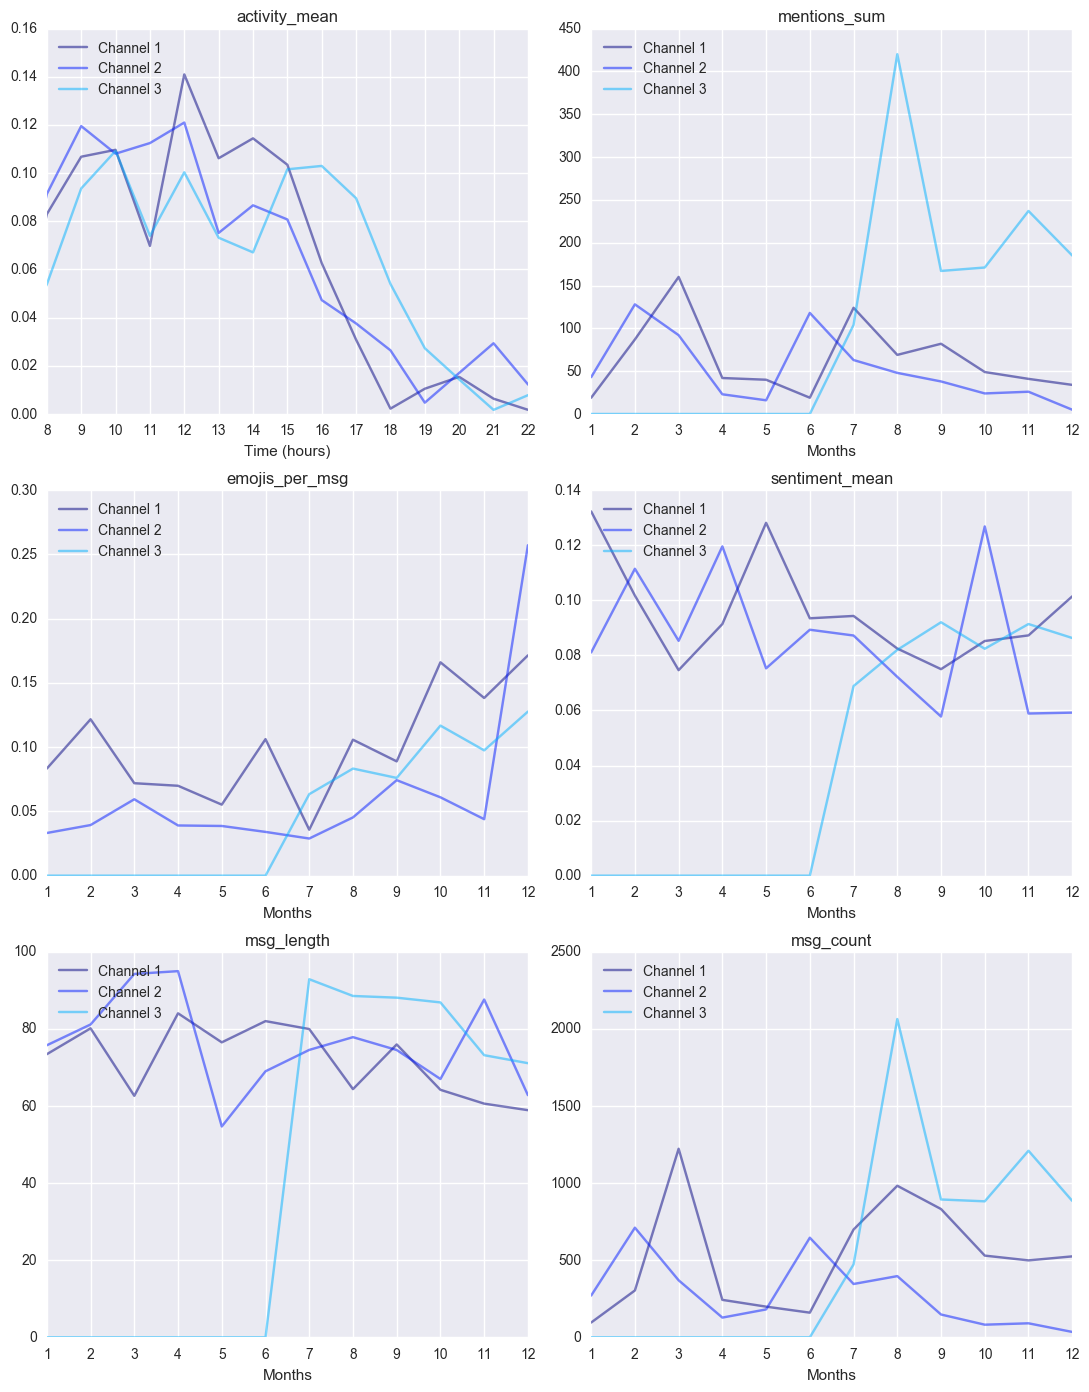

In [14]:
objs = [['Channel 1','channel'],
        ['Channel 2','channel'],
        ['Channel 3','channel']]

plot_compare_objs(df_public, objs=objs, start_month=1, end_month=12)

## Extensions to functionality

- Use more sophisticated techniques for sentiment analysis
- Filter dashboard by user and channel simultaneously
- Build comparable functionality for GitHub data
- Extend metric selection (e.g. response time, ...)
- Topic recognition & clustering
- Implement comparisons to show differences between private/public metrics